In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

from dnn_step_by_step import *

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [3]:
# Load the data 
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [4]:
# Explore the dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))


Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


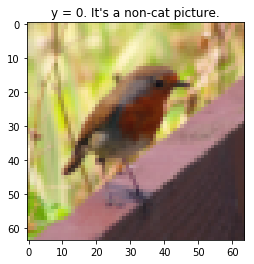

In [5]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
plt.title("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")
plt.show()

In [6]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

In [8]:
# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [9]:
### CONSTANTS DEFINING THE MODEL ####
#inputlayer =12288, l1 = 20, l2 = 7, l3 = 5, l4 = 1 
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

train the model as a 4-layer neural network
Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


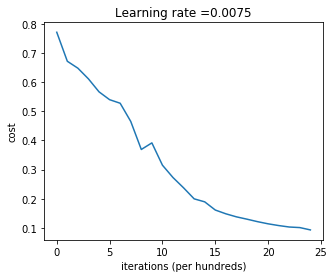

In [10]:
# train the model as a 4-layer neural network
print("train the model as a 4-layer neural network")
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [11]:
# prediction accuracy from training set 
print("Prediction accuracy from training set ")
pred_train = predict(train_x, train_y, parameters)

Prediction accuracy from training set 
Accuracy: 0.9856459330143539


In [12]:
# prediction accuracy from test set 
print("Prediction accuracy from test set ")
pred_test = predict(test_x, test_y, parameters)

Prediction accuracy from test set 
Accuracy: 0.8


Accuracy: 1.0


Text(0.5, 1.0, 'ypred = 1.0, your L-layer model predicts a "cat" picture.')

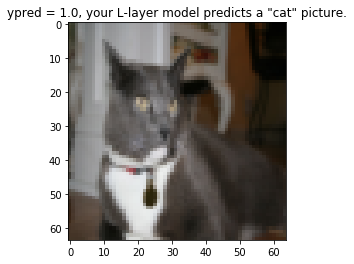

In [49]:
# Test a picture
index = 24
plt.imshow(test_x_orig[index])

my_predicted_image = predict(test_x[:,index].reshape((test_x.shape[0],1)), np.squeeze(test_y[0,index]), parameters)
plt.title ("ypred = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

Accuracy: 1.0


Text(0.5, 1.0, 'ypred = 0.0, your L-layer model predicts a "non-cat" picture.')

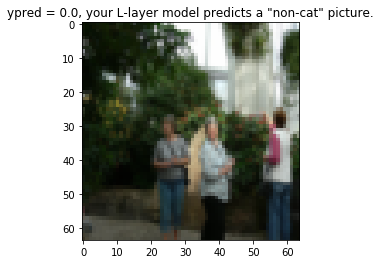

In [54]:
# Test a picture
index = 21
plt.imshow(test_x_orig[index])

my_predicted_image = predict(test_x[:,index].reshape((test_x.shape[0],1)), np.squeeze(test_y[0,index]), parameters)
plt.title ("ypred = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")